In [1]:
%load_ext autoreload
%autoreload 2
from matplotlib.path import Path
import numpy as np
import argparse
import os, sys
sys.path.append(os.path.dirname(os.getcwd()))
import polygon_primitives.file_writer as fw
import image_processing.camera_processing as cp
import image_processing.utils as utils
from image_processing import polygon_projection
from PIL import Image

import matplotlib.pyplot as plt
%matplotlib inline

We first initialize the directories, load the 'pmatrix' file and the corresponding 'offset' file, and load the merged polygons.

In [2]:
out_dir = "/Users/stouzani/Desktop/Unstructured_ML/Drone/Drone_Data_Capture/pix4d_HQ/"
facade_file = "/Users/stouzani/Desktop/Unstructured_ML/Drone/Drone_Data_Capture/pix4d_HQ/Data_results/merged_polygons.txt"

#Load the relevant files, and assign directory paths
image_dir = "/Users/stouzani/Desktop/Unstructured_ML/Drone/Drone_Data_Capture/pix4d_HQ/dji_demo/images/"
param_dir = "/Users/stouzani/Desktop/Unstructured_ML/Drone/Drone_Data_Capture/pix4d_HQ/pix4d_HQ/1_initial/params/"
offset = np.loadtxt(param_dir + "pix4d_HQ_offset.xyz",usecols=range(3))
polygon_offset = np.loadtxt("/Users/stouzani/Desktop/Unstructured_ML/Drone/Drone_Data_Capture/pix4d_HQ/Data_results/polygon_offset.txt", delimiter=",")
p_matrices = np.loadtxt(param_dir + 'pix4d_HQ_pmatrix.txt', usecols=range(1,13))
filenames = np.genfromtxt(param_dir + 'pix4d_HQ_pmatrix.txt', usecols=range(1), dtype=str)
merged_polygons, facade_type_list, file_format = fw.load_merged_polygon_facades(filename=facade_file)

In [29]:
merged_polygons

[[[[312946.05394414766, 5154344.304401312, 0.0],
   [312946.05394414766, 5154344.304401312, 17.83902602651183],
   [312946.82681608957, 5154374.492174975, 17.83902602651183],
   [312946.82681608957, 5154374.492174975, 0.0]],
  [[312946.82681608957, 5154374.492174975, 0.0],
   [312946.82681608957, 5154374.492174975, 17.83902602651183],
   [312976.98058559967, 5154373.926309907, 17.83902602651183],
   [312976.98058559967, 5154373.926309907, 0.0]],
  [[312976.98058559967, 5154373.926309907, 0.0],
   [312976.98058559967, 5154373.926309907, 17.83902602651183],
   [312976.25001899776, 5154343.740986131, 17.83902602651183],
   [312976.25001899776, 5154343.740986131, 0.0]],
  [[312976.25001899776, 5154343.740986131, 0.0],
   [312976.25001899776, 5154343.740986131, 17.83902602651183],
   [312946.05394414766, 5154344.304401312, 17.83902602651183],
   [312946.05394414766, 5154344.304401312, 0.0]],
  [[312946.05394414766, 5154344.304401312, 0.0],
   [312946.82681608957, 5154374.492174975, 0.0],
  

In [30]:
facade_type_list

[[0, 0, 0, 0, 1, 2]]

In [31]:
file_format

'UTM'

We next initialize a dictionary for the Cameras. The Camera class stores all information related to the camera, i.e. intrinsic and extrinsic camera parameters. We also add a height-adjustment to the polygons, and specify the image that we want to project the facades onto.

In [32]:
offset

array([3.129650e+05, 5.154361e+06, 3.630000e+02])

In [3]:
#Create a dictionary mapping the camera filename to a Camera object
camera_dict = polygon_projection.create_camera_dict(param_dir, filename="pix4d_HQ_calibrated_camera_parameters.txt", offset=offset)

#Adjust height if necessary for the camera images
height_adj = -polygon_offset[2]  #108.0#108.0
offset_adj = np.array([0.0, 0.0, height_adj])
offset = offset + offset_adj

#Sets the image file
image_filename = "DJI_0081.JPG" #"DJI_0113.JPG"

#Get the camera for the specified image file, and calculate the pmatrix
camera = camera_dict[image_filename]
pmatrix = camera.calc_pmatrix()

Finally, to project the merged polygons onto the image file, we simply load the image and run 'mark_image_file':

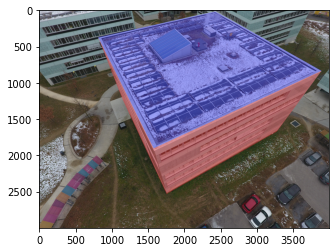

In [4]:
image = utils.load_image(image_dir + image_filename)
out_image = polygon_projection.mark_image_file(image, merged_polygons, facade_type_list, offset, pmatrix)

#Plotting
plt.imshow(np.asarray(out_image))
plt.show()

This can then be saved to an output directory 'out_dir' and filename 'filename', as illustrated below.

In [5]:
utils.save_image(out_image, out_dir, image_filename)

Saving image...


To crop the image so that only a single facade is visible:

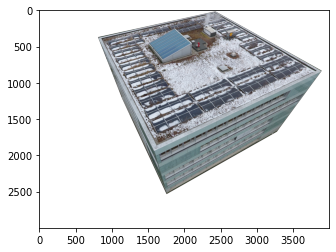

In [6]:
cropped_image = polygon_projection.crop_image_outside_building(image, merged_polygons, offset, pmatrix)

#Plotting
plt.imshow(np.asarray(cropped_image))
plt.show()